In [1]:
import numpy as np
import scipy.stats as sc
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

# Fitting Input Distributions to the Provided Data

1. Observe that there are data points with unreasonable value of 'time of day' (greater than 24), which should be dropped.  

In [3]:
data = pd.read_csv('TonerItDown.csv')
data = data[data['Time of day']<24]

In [3]:
data.head()

,Request no,Day,Time of day,Request location,Initial diagnose time,Needs Replacement?,On-site repair time
0,1,1,0.239113,BC_10,12.633020,NaN,22.125290
1,2,1,1.139550,BC_1,19.486501,yes,NaN
2,3,1,1.309831,BC_5,16.161550,NaN,7.349665
3,4,1,1.458689,BC_4,17.991248,NaN,31.835509
4,5,1,1.754376,BC_5,16.736394,NaN,10.733933


2. Assuming each data point iid, then 
$$
\hat p = \frac{\text{# needs replacement}}{\text{total}} = 0.1805
$$
$$
\hat \sigma \approx \sqrt{\hat p(1-\hat p)} = 0.3846
$$
Then the confidence interval is 
$$
[\hat p - z_{\alpha/2}\frac{\hat \sigma}{\sqrt{n}},\hat p + z_{\alpha/2}\frac{\hat \sigma}{\sqrt{n}}] = [0.1716,0.1894]
$$
where $\alpha = 0.05$

In [4]:
n = len(data)
#assuming iid
p_hat = len(data[data['Needs Replacement?'] == 'yes']) / len(data)
std = np.sqrt(p_hat * (1-p_hat))
LB = p_hat - sc.norm.ppf(1-0.05/2)*std / np.sqrt(n)
UB = p_hat + sc.norm.ppf(1-0.05/2)*std / np.sqrt(n)
(LB,UB)

(0.1716041123991188, 0.18941780579158343)

3. The histogram looks like a continuous distribution. We perform Kolmogorov-Smirnov tests for Beta, Gamma, Lognormal, Exponential and Rayleigh distribution, respectively. According to p-value, we can see that the two distributions that appear to fit the
data the best are the beta distribution and the rayleigh distribution.



In [5]:
# data set of on site repairs
data_on_site = data['On-site repair time'][data['Needs Replacement?'] != 'yes']
# total number of on-site repairs 
n_on_site = len(data_on_site)

In [6]:
# Normal fit
param = sc.norm.fit(data_on_site)

# K-S test
test_stat, p_value = sc.stats.kstest(data_on_site,'norm',args=param)
p_value

9.798105891322495e-13

In [7]:
#lognormal fit
param = sc.lognorm.fit(data_on_site)

# K-S test
test_stat, p_value = sc.stats.kstest(data_on_site,'lognorm',args=param)
p_value

0.0011345757782733393

In [8]:
#exponential fit
param = sc.expon.fit(data_on_site)

#K-S test
test_stat, p_value = sc.stats.kstest(data_on_site,'expon',args=param)
p_value

3.990212171645366e-239

In [9]:
# Gamma fit
param = sc.gamma.fit(data_on_site)
test_stat, p_value = sc.stats.kstest(data_on_site,'gamma',args=param)
p_value

0.003355508191113828

In [10]:
# Rayleigh fit 
param = sc.rayleigh.fit(data_on_site)

# K-S test
test_stat, p_value = sc.stats.kstest(data_on_site,'rayleigh',args=param)
p_value

0.5268019074548905

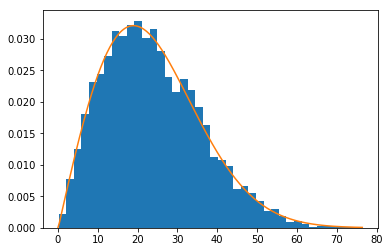

In [11]:
# fitted pdf of Rayleigh
plt.hist(data_on_site,bins = 40,density = True)
params = sc.rayleigh.fit(data_on_site)
x = np.linspace(0, max(data_on_site), 200)
pdf_fitted = sc.rayleigh.pdf(x,params[0],params[1])
plt.plot(x,pdf_fitted)

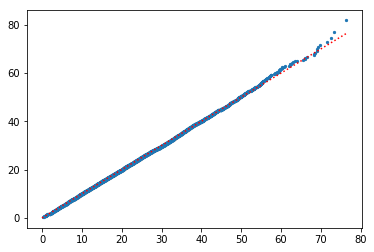

In [12]:
# QQ-plot of Rayleigh
Z = sc.rayleigh.ppf((range(n_on_site) + 0.5*np.ones(n_on_site))/n_on_site, *param[:-2], loc=param[-2], scale=param[-1])
plt.scatter(np.sort(data_on_site), Z, s=5);
plt.plot([0, np.max(data_on_site)], [0, np.max(data_on_site)], ':r');

In [13]:
# Beta fit
param = sc.beta.fit(data_on_site)

# K-S test
test_stat, p_value = sc.stats.kstest(data_on_site,'beta',args=param)
p_value

C:\Users\yl2999\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:437: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


0.6979057408649626

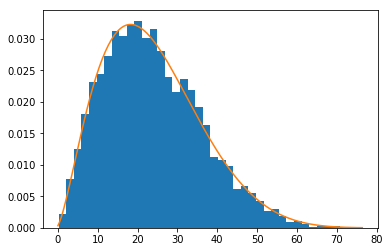

In [14]:
# pdf of fitted Beta 
plt.hist(data_on_site,bins = 40,density = True)
params = sc.beta.fit(data_on_site)
x = np.linspace(0, max(data_on_site), 200)
pdf_fitted = sc.beta.pdf(x,params[0],params[1],params[2],params[3])
plt.plot(x,pdf_fitted)

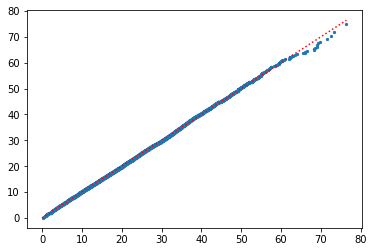

In [15]:
# QQ-plot
Z = sc.beta.ppf((range(n_on_site) + 0.5*np.ones(n_on_site))/n_on_site, *param[:-2], loc=param[-2], scale=param[-1])
plt.scatter(np.sort(data_on_site), Z, s=5);
plt.plot([0, np.max(data_on_site)], [0, np.max(data_on_site)], ':r');

4. (a) No

(array([  3.,   1.,   1.,   2.,   2.,   3.,   2.,   6.,  11.,   6.,  14.,
         24.,  16.,  32.,  28.,  42.,  41.,  62.,  70.,  89., 113., 115.,
        130., 162., 171., 189., 220., 218., 233., 241., 236., 274., 265.,
        287., 272., 252., 241., 221., 231., 191., 182., 166., 157., 128.,
        128., 119.,  91.,  93.,  98.,  92.,  72.,  61.,  70.,  76.,  66.,
         74.,  63.,  55.,  58.,  47.,  42.,  50.,  36.,  39.,  33.,  35.,
         29.,  29.,  28.,  17.,  21.,  26.,  21.,  18.,  13.,  12.,  15.,
         15.,   8.,   9.,   5.,   8.,   6.,   6.,   4.,   8.,   4.,   2.,
          1.,   1.,   2.,   1.,   0.,   2.,   0.,   1.,   1.,   0.,   0.,
          2.]),
 array([ 5.14951037,  5.49573133,  5.84195229,  6.18817325,  6.5343942 ,
         6.88061516,  7.22683612,  7.57305708,  7.91927803,  8.26549899,
         8.61171995,  8.9579409 ,  9.30416186,  9.65038282,  9.99660378,
        10.34282473, 10.68904569, 11.03526665, 11.38148761, 11.72770856,
        12.07392952, 12.42

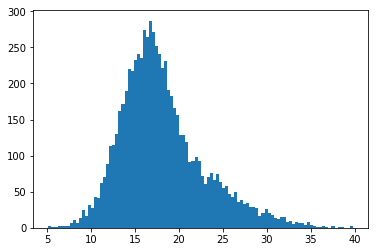

In [16]:
plt.hist(data['Initial diagnose time'],bins = 100)

(b) Values differ substantially for some BCs, namely, BC_2, BC_3 and BC_9.

In [17]:
data.groupby(by = 'Request location')['Initial diagnose time'].mean()

Request location
BC_1     15.974684
BC_10    16.109307
BC_2     22.174312
BC_3     22.009613
BC_4     16.175101
BC_5     16.200575
BC_6     16.151506
BC_7     16.011773
BC_8     16.269802
BC_9     22.236205
Name: Initial diagnose time, dtype: float64

In [18]:
data.groupby(by = 'Request location')['Initial diagnose time'].std()

Request location
BC_1     2.954169
BC_10    2.919997
BC_2     5.248368
BC_3     5.405268
BC_4     2.851679
BC_5     2.882792
BC_6     2.847626
BC_7     2.923965
BC_8     2.875527
BC_9     5.358455
Name: Initial diagnose time, dtype: float64

(c) we divide the data points into to groups:
*   Group 1: BC2, BC3, BC9 (similar $\hat\mu,\hat\sigma$)
*   Group 2: all others (similar $\hat\mu, \hat\sigma$)

(d) We model initial diagnosis times for BCs in Group 1 from one distribution and model initial diagnosis times for BCs in Group 2 from another distribution.

For both groups, we fit the data points using a normal distribution and perform a K-S test. The results show that normal distribtuion is a good fit for both groups. The fitted normal distributions are given below:

*   Group 1: $N(\hat\mu = 16.13, \hat\sigma=2.89)$
*   Group 2: $N(\hat\mu = 22.15, \hat\sigma = 5.34)$

(array([0.00092338, 0.00215455, 0.00369352, 0.00523248, 0.008926  ,
        0.01662082, 0.02523902, 0.03324164, 0.05047804, 0.05817286,
        0.06248197, 0.06740665, 0.07356251, 0.07910278, 0.06586769,
        0.05109363, 0.03878191, 0.02831695, 0.01969875, 0.01446627,
        0.00769482, 0.00554027, 0.00153896, 0.00092338, 0.00092338]),
 array([ 5.14951037,  6.5343942 ,  7.91927803,  9.30416186, 10.68904569,
        12.07392952, 13.45881335, 14.84369718, 16.22858101, 17.61346484,
        18.99834867, 20.3832325 , 21.76811633, 23.15300016, 24.53788399,
        25.92276782, 27.30765165, 28.69253547, 30.0774193 , 31.46230313,
        32.84718696, 34.23207079, 35.61695462, 37.00183845, 38.38672228,
        39.77160611]),
 <a list of 25 Patch objects>)

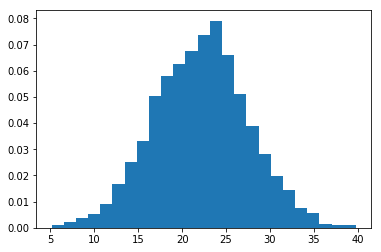

In [19]:
plt.hist(data[data['Request location'].isin(['BC_2','BC_3','BC_9'])]['Initial diagnose time'],bins = 25,density = True)

(array([0.00049278, 0.00073916, 0.00098555, 0.00418859, 0.00862358,
        0.01478328, 0.02389963, 0.04163956, 0.06282892, 0.08549661,
        0.10890346, 0.12171563, 0.13575974, 0.14265861, 0.12417951,
        0.10299015, 0.07810497, 0.05321979, 0.03547986, 0.01921826,
        0.01108746, 0.00394221, 0.00369582, 0.00147833, 0.00073916]),
 array([ 5.33424476,  6.17681079,  7.01937681,  7.86194284,  8.70450887,
         9.54707489, 10.38964092, 11.23220695, 12.07477298, 12.917339  ,
        13.75990503, 14.60247106, 15.44503709, 16.28760311, 17.13016914,
        17.97273517, 18.81530119, 19.65786722, 20.50043325, 21.34299928,
        22.1855653 , 23.02813133, 23.87069736, 24.71326339, 25.55582941,
        26.39839544]),
 <a list of 25 Patch objects>)

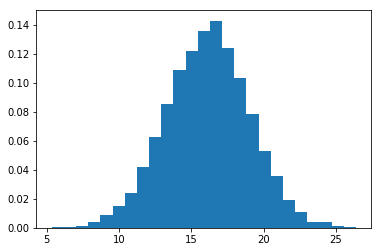

In [20]:
plt.hist(data[data['Request location'].isin(['BC_1','BC_10','BC_4','BC_5','BC_6','BC_7','BC_8'])]['Initial diagnose time'],bins = 25,density = True)

In [21]:
param = sc.norm.fit(data[data['Request location'].isin(['BC_1','BC_10','BC_4','BC_5','BC_6','BC_7','BC_8'])]['Initial diagnose time'])
test_stat, p_value = sc.stats.kstest(data[data['Request location'].isin(['BC_1','BC_10','BC_4','BC_5','BC_6','BC_7','BC_8'])]['Initial diagnose time'],'norm',args=param)
p_value

0.8546626039428126

In [22]:
param

(16.13003269338821, 2.8919908783753776)

In [23]:
param = sc.norm.fit(data[data['Request location'].isin(['BC_2','BC_3','BC_9'])]['Initial diagnose time'])
test_stat, p_value = sc.stats.kstest(data[data['Request location'].isin(['BC_2','BC_3','BC_9'])]['Initial diagnose time'],'norm',args=param)
p_value

0.8499948365526829

In [24]:
param

(22.146030890908783, 5.344128929273767)

5. For each business center $j$ ($j=1,2,\cdots, 10)$
$$
\hat p_j = \frac{1}{n}\sum_{i=1}^{n}1_{\{\text{call }i\text{ originates at }j\}}
$$
$$
\hat \sigma_{j} \approx \sqrt{\hat p_{j}(1-\hat p_{j})}.
$$

Then the confidence interval for $p_{j}$ is 
$$
[\hat p_j - z_{\alpha/2}\frac{\hat \sigma_j}{\sqrt{n}},\hat p_j + z_{\alpha/2}\frac{\hat \sigma_j}{\sqrt{n}}] 
$$
where $\alpha = 0.05$.

In [5]:
p_hat = data.groupby(by = 'Request location')['Initial diagnose time'].size() / n
std = np.sqrt(p_hat * (1-p_hat))
LB = p_hat - sc.norm.ppf(1-0.05/2) * std / np.sqrt(n)
UB = p_hat + sc.norm.ppf(1-0.05/2) * std / np.sqrt(n)

In [8]:
p_hat

Request location
BC_1     0.039509
BC_10    0.142398
BC_2     0.082089
BC_3     0.107916
BC_4     0.135418
BC_5     0.118386
BC_6     0.055005
BC_7     0.123831
BC_8     0.057937
BC_9     0.137512
Name: Initial diagnose time, dtype: float64

In [6]:
std

Request location
BC_1     0.194802
BC_10    0.349458
BC_2     0.274500
BC_3     0.310274
BC_4     0.342170
BC_5     0.323065
BC_6     0.227990
BC_7     0.329388
BC_8     0.233624
BC_9     0.344387
Name: Initial diagnose time, dtype: float64

In [7]:
CI = pd.concat([LB,UB], axis = 1)
CI.columns = ['LB','UB']
CI

,LB,UB
Request location,,
BC_1,0.034997,0.044020
BC_10,0.134306,0.150491
BC_2,0.075732,0.088445
BC_3,0.100730,0.115101
BC_4,0.127494,0.143342
BC_5,0.110905,0.125868
BC_6,0.049725,0.060285
BC_7,0.116203,0.131459
BC_8,0.052526,0.063347


6. We find number of arrivals during each hour of the day over the 60 days of data. Then, calculate the estimated arrival rate for each hour
$$
\hat{\lambda_{i}} = \frac{\# arrival_{i}}{60},\quad i=0,1,\cdots, 23.
$$

In [27]:
emp_rate = data.groupby(data['Time of day'].apply(np.floor)).size() / 60
emp_rate = emp_rate.values

By plotting the empirical rates, we observe that the rate function is approximately quadratic between 3am and 22pm. We fit a quadratic function to the estimated hourly rates:
$$
\lambda(i) = -0.067i^2 +1.581i-1.289.
$$
We assume the rate is constant for the other hours, which is estimated to be 1.137. We plot the fitted rate function against the empirical rates and see that it is a good fit.

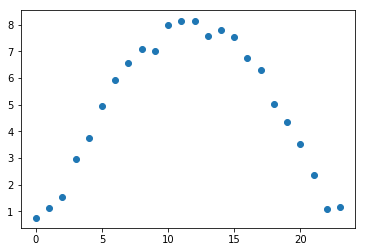

In [28]:
plt.scatter(np.arange(24),emp_rate)

In [29]:
coeffs = np.polyfit(np.arange(3,22),emp_rate[3:22],deg = 2)
coeffs

array([-0.0672404 ,  1.5811089 , -1.28926581])

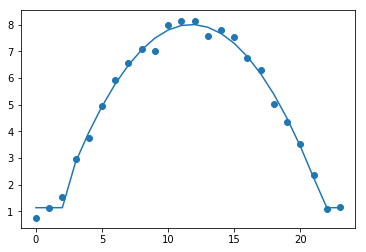

In [30]:
fitted_rate = np.zeros(24)
fitted_rate[3:22] = coeffs[0]*np.arange(3,22) ** 2 + coeffs[1]*np.arange(3,22) + coeffs[2]
fitted_rate[[0,1,2,22,23]] = np.mean(emp_rate[[0,1,2,22,23]])
plt.scatter(np.arange(24),emp_rate)
plt.plot(np.arange(24),fitted_rate)

In [31]:
pd.DataFrame(data = fitted_rate,columns = ['fitted rate'])

,fitted rate
0,1.136667
1,1.136667
2,1.136667
3,2.848897
4,3.959323
5,4.935269
6,5.776733
7,6.483717
8,7.056219
9,7.494241


7. From the description of the project, we know the swap time for disbatch center is distributed as $Triangular(min = 10,max = 25,mostlikely = 15)$ and the swap time for customer location is distributed as $Triangular(min = 20,max = 60,mostlikely = 30)$.